In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps

In [3]:
import pandas as pd

## Задание 1

In [4]:
def generate_values(matrix):
    A = np.linalg.cholesky(matrix)
    z = np.random.normal(size=(matrix.shape[0],10000))
    x = A@z
    return x

In [5]:
M = np.matrix([[1, 0.5],[0.5, 1]])
generate_values(M)

    

matrix([[ 0.29318362,  0.88944093,  0.69392696, ...,  0.90114374,
          1.13435642, -0.21560689],
        [ 0.08469221,  0.86951462,  0.79015059, ...,  0.56080193,
          1.37165001,  0.13798587]])

In [6]:
np.cov(generate_values(M))

array([[0.99326312, 0.51464307],
       [0.51464307, 1.00580297]])

Получилось достаточно хорошо, при увеличении выборки набор случайных величин будет как можно ближе описывать заданную ковариационную матрицу

## Задание 2

In [7]:
df = pd.read_excel("C:/Users/Матвей/Downloads/data.xlsx")
df

,x,y
0,1.2,1.1
1,1.9,2.0
2,2.7,2.7
3,3.4,3.5
4,4.0,3.9
5,4.8,4.9
6,5.3,5.5
7,5.9,5.8
8,6.7,6.7
9,7.4,7.7


Будем пользоваться библитекой sklearn

In [8]:
x = df['x'].to_frame()
y = df['y'].to_frame()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

LinearRegression()

In [15]:
k, b =(model.coef_[0][0], model.intercept_[0])
k, b

(0.9945056713056072, 0.045476631003135815)

C:\Users\Матвей\AppData\Local\Temp\ipykernel_20276\1045246104.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both')


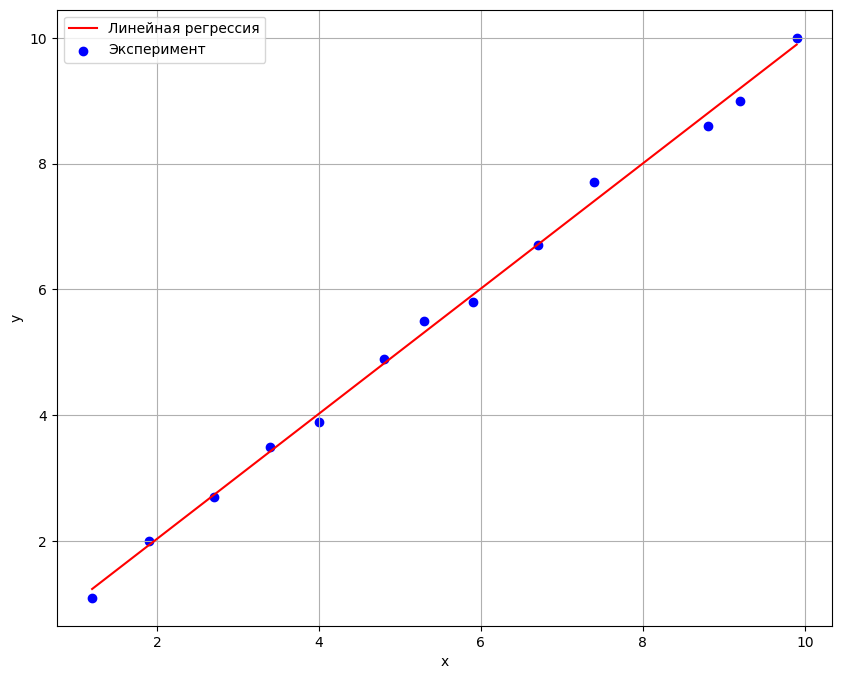

In [13]:
y_pred = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x, y_pred, color='red', label="Линейная регрессия")
plt.scatter(x, y, color='blue', label="Эксперимент")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(b=True, which='both')
plt.legend()
plt.show()


In [19]:
xs = np.arange(0, 10, 0.5)
noise = np.random.normal(0, 0.45, size=xs.shape)
ys = k * xs + b + noise
ys

array([0.63496268, 0.69552984, 1.69634009, 1.1512283 , 1.98760226,
       3.16870231, 3.25471183, 4.14565054, 4.44073621, 4.39714938,
       5.53187379, 5.92291614, 5.42505286, 7.26010173, 6.53759489,
       7.9315091 , 8.23795627, 8.13640449, 9.32050757, 9.45342813])

In [24]:
model.fit(xs.reshape(-1,1), ys.reshape(-1,1))
k_new, b_new = (model.coef_[0][0], model.intercept_[0])
k_new, b_new

(0.9603352001431504, 0.40490571945148535)

C:\Users\Матвей\AppData\Local\Temp\ipykernel_20276\568058600.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both')


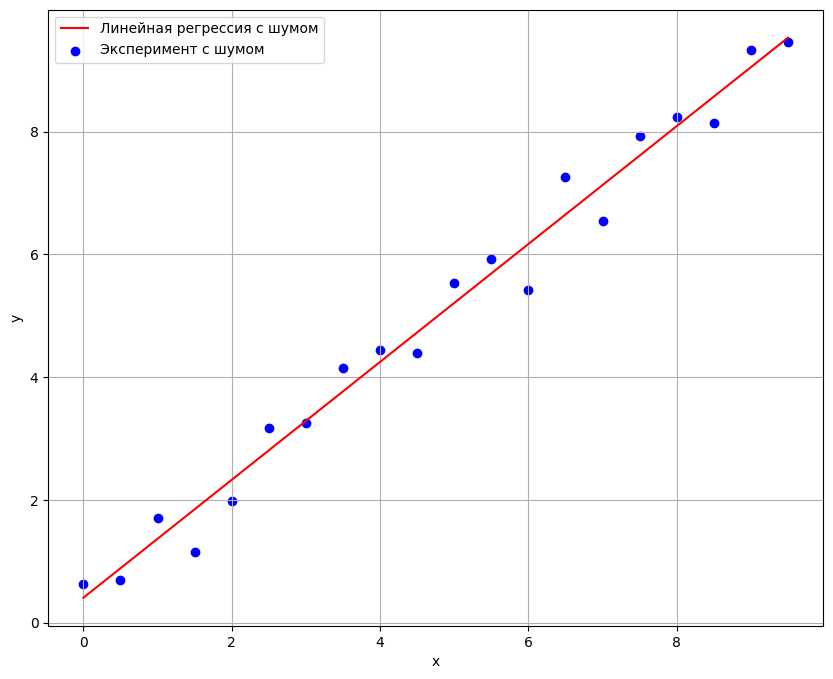

In [27]:
y_pred_s = model.predict(xs.reshape(-1,1))
plt.figure(figsize=(10,8))
plt.plot(xs.reshape(-1,1), y_pred_s, color='red', label="Линейная регрессия с шумом")
plt.scatter(xs.reshape(-1,1), ys.reshape(-1,1), color='blue', label="Эксперимент с шумом")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(b=True, which='both')
plt.legend()
plt.show()

В основном шум повлиял только на пересечение с осью игрек, а также раздвинул точки от аппроксимирующей прямой, влияние на коэффициент наклона несущественное